In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 33)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),45)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(45):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(45 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

16

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:649
number of class2:968

 ****** Running generation 0 ****** 

Population's average fitness: 0.52340 stdev: 0.09816
Best fitness: 0.75696 - size: (2, 13) - species 1 - id 143
Average adjusted fitness: 0.196
Mean genetic distance 2.893, standard deviation 0.462
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 5.576 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57134 stdev: 0.09470
Best fitness: 0.76005 - size: (2, 13) - species 1 - id 348
Average adjusted fitness: 0.262
Mean genetic distance 2.998, standard deviation 0.481
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.733 sec (6.154 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58199 stdev: 0.09608
Best fitness: 0.76067 - size: (4, 17) - species 25 - id 526
Average adjusted fitness: 0.205
Mean genetic distance 2.941, standard deviation 0.475
Population of 202 members in 27 species
Total extincti

Population's average fitness: 0.67080 stdev: 0.09786
Best fitness: 0.81323 - size: (7, 23) - species 25 - id 2521
Average adjusted fitness: 0.266
Mean genetic distance 3.243, standard deviation 0.490
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 7.548 sec (7.642 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66337 stdev: 0.09608
Best fitness: 0.81323 - size: (7, 23) - species 25 - id 2521
Average adjusted fitness: 0.264
Mean genetic distance 3.234, standard deviation 0.500
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 7.633 sec (7.667 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66182 stdev: 0.11026
Best fitness: 0.81323 - size: (7, 23) - species 25 - id 2521
Average adjusted fitness: 0.366
Mean genetic distance 3.234, standard deviation 0.496
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.796 sec (7.740 average)

 ******

Population's average fitness: 0.62956 stdev: 0.09004
Best fitness: 0.79097 - size: (5, 21) - species 6 - id 1536
Average adjusted fitness: 0.223
Mean genetic distance 3.167, standard deviation 0.496
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 7.339 sec (6.788 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62550 stdev: 0.09713
Best fitness: 0.79097 - size: (5, 21) - species 6 - id 1536
Average adjusted fitness: 0.296
Mean genetic distance 3.168, standard deviation 0.490
Population of 192 members in 35 species
Total extinctions: 0
Generation time: 7.046 sec (6.850 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62316 stdev: 0.09175
Best fitness: 0.79097 - size: (5, 21) - species 6 - id 1536
Average adjusted fitness: 0.231
Mean genetic distance 3.180, standard deviation 0.490
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.858 sec (6.882 average)

 ****** Ru

Total extinctions: 0
Generation time: 6.178 sec (5.886 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64618 stdev: 0.12570
Best fitness: 0.80458 - size: (3, 16) - species 8 - id 1233
Average adjusted fitness: 0.351
Mean genetic distance 3.076, standard deviation 0.484
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.355 sec (5.945 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64277 stdev: 0.13170
Best fitness: 0.80458 - size: (3, 16) - species 8 - id 1233
Average adjusted fitness: 0.339
Mean genetic distance 3.079, standard deviation 0.490
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 6.603 sec (6.018 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65342 stdev: 0.12895
Best fitness: 0.82560 - size: (4, 17) - species 8 - id 1511
Average adjusted fitness: 0.353
Mean genetic distance 3.090, standard deviation 0.487
Population of 

Mean genetic distance 3.177, standard deviation 0.495
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 7.297 sec (7.419 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.67240 stdev: 0.12753
Best fitness: 0.82560 - size: (4, 17) - species 8 - id 1511
Average adjusted fitness: 0.372
Mean genetic distance 3.177, standard deviation 0.504
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 7.649 sec (7.442 average)
number of class1:487
number of class2:1130

 ****** Running generation 0 ****** 

Population's average fitness: 0.52710 stdev: 0.14525
Best fitness: 0.81756 - size: (2, 13) - species 3 - id 128
Average adjusted fitness: 0.276
Mean genetic distance 2.946, standard deviation 0.511
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5.338 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60116 stdev: 0.14279
Best fitness: 0.81756 - size: (2, 13) -

Mean genetic distance 3.208, standard deviation 0.512
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 8.537 sec (7.351 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.69474 stdev: 0.11887
Best fitness: 0.82560 - size: (8, 25) - species 5 - id 2991
Average adjusted fitness: 0.443
Mean genetic distance 3.203, standard deviation 0.522
Population of 190 members in 32 species
Total extinctions: 0
Generation time: 8.290 sec (7.486 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.68724 stdev: 0.12905
Best fitness: 0.82560 - size: (8, 25) - species 5 - id 2991
Average adjusted fitness: 0.399
Mean genetic distance 3.221, standard deviation 0.526
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 7.839 sec (7.554 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.68949 stdev: 0.12667
Best fitness: 0.82560 - size: (7, 21) - species 5 - id 3391
Ave

Mean genetic distance 3.220, standard deviation 0.506
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 7.733 sec (7.139 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61825 stdev: 0.09414
Best fitness: 0.78293 - size: (5, 20) - species 19 - id 1832
Average adjusted fitness: 0.233
Mean genetic distance 3.194, standard deviation 0.498
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 7.923 sec (7.283 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63464 stdev: 0.08230
Best fitness: 0.78293 - size: (5, 20) - species 19 - id 1832
Average adjusted fitness: 0.184
Mean genetic distance 3.169, standard deviation 0.506
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 7.929 sec (7.410 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63295 stdev: 0.08858
Best fitness: 0.80025 - size: (5, 22) - species 18 - id 2304


Total extinctions: 0
Generation time: 6.118 sec (5.800 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59741 stdev: 0.10695
Best fitness: 0.78912 - size: (3, 14) - species 23 - id 811
Average adjusted fitness: 0.316
Mean genetic distance 3.046, standard deviation 0.475
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 6.549 sec (5.925 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61464 stdev: 0.09778
Best fitness: 0.78912 - size: (3, 14) - species 23 - id 811
Average adjusted fitness: 0.326
Mean genetic distance 3.069, standard deviation 0.476
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.146 sec (5.956 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61268 stdev: 0.10824
Best fitness: 0.78912 - size: (3, 14) - species 23 - id 811
Average adjusted fitness: 0.326
Mean genetic distance 3.082, standard deviation 0.489
Population of 

Population's average fitness: 0.65608 stdev: 0.12206
Best fitness: 0.82127 - size: (10, 30) - species 5 - id 3878
Average adjusted fitness: 0.299
Mean genetic distance 3.281, standard deviation 0.525
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 7.440 sec (7.830 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.64977 stdev: 0.12255
Best fitness: 0.82127 - size: (10, 30) - species 5 - id 3878
Average adjusted fitness: 0.355
Mean genetic distance 3.257, standard deviation 0.536
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 7.811 sec (7.888 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.65414 stdev: 0.12202
Best fitness: 0.82127 - size: (10, 30) - species 5 - id 3878
Average adjusted fitness: 0.307
Mean genetic distance 3.282, standard deviation 0.538
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 7.978 sec (7.953 average)

 ******

Population's average fitness: 0.64820 stdev: 0.10546
Best fitness: 0.81447 - size: (6, 20) - species 29 - id 1491
Average adjusted fitness: 0.278
Mean genetic distance 3.232, standard deviation 0.551
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 9.192 sec (7.181 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.65273 stdev: 0.09772
Best fitness: 0.81447 - size: (6, 20) - species 29 - id 1491
Average adjusted fitness: 0.243
Mean genetic distance 3.228, standard deviation 0.547
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 8.896 sec (7.405 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64907 stdev: 0.10447
Best fitness: 0.81694 - size: (6, 22) - species 39 - id 3179
Average adjusted fitness: 0.316
Mean genetic distance 3.206, standard deviation 0.543
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.346 sec (7.529 average)

 ******

Mean genetic distance 3.163, standard deviation 0.467
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 6.634 sec (7.359 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62610 stdev: 0.10164
Best fitness: 0.79097 - size: (4, 18) - species 36 - id 1465
Average adjusted fitness: 0.241
Mean genetic distance 3.165, standard deviation 0.465
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.063 sec (7.208 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61920 stdev: 0.10450
Best fitness: 0.79097 - size: (4, 18) - species 36 - id 1465
Average adjusted fitness: 0.280
Mean genetic distance 3.157, standard deviation 0.464
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.006 sec (7.130 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63303 stdev: 0.09738
Best fitness: 0.79097 - size: (4, 18) - species 36 - id 1465


Population's average fitness: 0.56581 stdev: 0.07731
Best fitness: 0.79530 - size: (3, 15) - species 4 - id 209
Average adjusted fitness: 0.186
Mean genetic distance 3.020, standard deviation 0.510
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 6.093 sec (5.767 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56945 stdev: 0.08468
Best fitness: 0.79530 - size: (3, 15) - species 4 - id 209
Average adjusted fitness: 0.201
Mean genetic distance 3.069, standard deviation 0.512
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 8.243 sec (6.262 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57869 stdev: 0.09281
Best fitness: 0.79530 - size: (3, 15) - species 4 - id 209
Average adjusted fitness: 0.293
Mean genetic distance 3.119, standard deviation 0.514
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 8.559 sec (6.645 average)

 ****** Running

Population's average fitness: 0.66563 stdev: 0.11358
Best fitness: 0.85034 - size: (6, 23) - species 26 - id 2452
Average adjusted fitness: 0.224
Mean genetic distance 3.402, standard deviation 0.492
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 9.211 sec (8.510 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.67004 stdev: 0.11040
Best fitness: 0.85034 - size: (6, 23) - species 26 - id 2452
Average adjusted fitness: 0.238
Mean genetic distance 3.372, standard deviation 0.501
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 9.217 sec (8.685 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.67415 stdev: 0.10984
Best fitness: 0.85034 - size: (6, 23) - species 26 - id 2452
Average adjusted fitness: 0.262
Mean genetic distance 3.373, standard deviation 0.499
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 8.678 sec (8.782 average)

 ******

Population's average fitness: 0.62125 stdev: 0.09609
Best fitness: 0.78726 - size: (7, 21) - species 17 - id 1671
Average adjusted fitness: 0.230
Mean genetic distance 3.267, standard deviation 0.488
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.569 sec (7.371 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61990 stdev: 0.10549
Best fitness: 0.78726 - size: (7, 21) - species 17 - id 1671
Average adjusted fitness: 0.305
Mean genetic distance 3.289, standard deviation 0.496
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 7.819 sec (7.447 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61257 stdev: 0.10905
Best fitness: 0.78912 - size: (8, 23) - species 17 - id 2990
Average adjusted fitness: 0.244
Mean genetic distance 3.281, standard deviation 0.496
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.349 sec (7.480 average)

 ******

Population's average fitness: 0.67871 stdev: 0.11870
Best fitness: 0.81942 - size: (5, 23) - species 8 - id 992
Average adjusted fitness: 0.398
Mean genetic distance 3.198, standard deviation 0.537
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 6.689 sec (6.153 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69435 stdev: 0.09870
Best fitness: 0.83179 - size: (5, 23) - species 8 - id 1661
Average adjusted fitness: 0.391
Mean genetic distance 3.207, standard deviation 0.539
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 6.836 sec (6.318 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.68598 stdev: 0.11338
Best fitness: 0.83179 - size: (5, 23) - species 8 - id 1661
Average adjusted fitness: 0.458
Mean genetic distance 3.177, standard deviation 0.539
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 6.790 sec (6.438 average)

 ****** Run

Population's average fitness: 0.49338 stdev: 0.08618
Best fitness: 0.70254 - size: (2, 13) - species 1 - id 42
Average adjusted fitness: 0.171
Mean genetic distance 2.852, standard deviation 0.439
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 5.235 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54075 stdev: 0.08710
Best fitness: 0.70254 - size: (2, 13) - species 1 - id 42
Average adjusted fitness: 0.265
Mean genetic distance 2.921, standard deviation 0.453
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 5.563 sec (5.399 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55683 stdev: 0.08180
Best fitness: 0.70254 - size: (2, 13) - species 1 - id 42
Average adjusted fitness: 0.198
Mean genetic distance 2.991, standard deviation 0.483
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 5.737 sec (5.512 average)

 ****** Running generation 3 *****

Population's average fitness: 0.61432 stdev: 0.08418
Best fitness: 0.73160 - size: (5, 16) - species 1 - id 2118
Average adjusted fitness: 0.239
Mean genetic distance 3.245, standard deviation 0.486
Population of 192 members in 35 species
Total extinctions: 0
Generation time: 7.866 sec (7.498 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61195 stdev: 0.08912
Best fitness: 0.73160 - size: (5, 16) - species 1 - id 2118
Average adjusted fitness: 0.258
Mean genetic distance 3.289, standard deviation 0.500
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 7.122 sec (7.482 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60762 stdev: 0.09144
Best fitness: 0.74892 - size: (7, 25) - species 8 - id 3568
Average adjusted fitness: 0.219
Mean genetic distance 3.281, standard deviation 0.514
Population of 189 members in 31 species
Total extinctions: 0
Generation time: 7.337 sec (7.492 average)

 ****** Ru

Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.556 sec (6.538 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61458 stdev: 0.10713
Best fitness: 0.77984 - size: (6, 23) - species 6 - id 2335
Average adjusted fitness: 0.226
Mean genetic distance 3.130, standard deviation 0.490
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 6.653 sec (6.550 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63245 stdev: 0.09598
Best fitness: 0.77984 - size: (6, 23) - species 6 - id 2335
Average adjusted fitness: 0.285
Mean genetic distance 3.136, standard deviation 0.488
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.668 sec (6.573 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61948 stdev: 0.10858
Best fitness: 0.77984 - size: (6, 23) - species 6 - id 2335
Average adjusted fitness: 0.230
Mean genetic distance 3.1

Total extinctions: 0
Generation time: 6.450 sec (5.989 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58003 stdev: 0.09721
Best fitness: 0.74706 - size: (4, 17) - species 30 - id 1045
Average adjusted fitness: 0.263
Mean genetic distance 3.092, standard deviation 0.509
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 6.459 sec (6.048 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58228 stdev: 0.09603
Best fitness: 0.76314 - size: (4, 17) - species 16 - id 1303
Average adjusted fitness: 0.269
Mean genetic distance 3.068, standard deviation 0.494
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.630 sec (6.113 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59854 stdev: 0.08838
Best fitness: 0.76314 - size: (4, 17) - species 16 - id 1303
Average adjusted fitness: 0.236
Mean genetic distance 3.079, standard deviation 0.495
Population 

Population's average fitness: 0.60740 stdev: 0.10426
Best fitness: 0.76562 - size: (7, 24) - species 30 - id 4360
Average adjusted fitness: 0.232
Mean genetic distance 3.343, standard deviation 0.535
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 8.322 sec (7.914 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.61670 stdev: 0.10010
Best fitness: 0.76562 - size: (7, 24) - species 30 - id 4360
Average adjusted fitness: 0.229
Mean genetic distance 3.362, standard deviation 0.533
Population of 192 members in 26 species
Total extinctions: 0
Generation time: 8.285 sec (7.993 average)
number of class1:648
number of class2:969

 ****** Running generation 0 ****** 

Population's average fitness: 0.53528 stdev: 0.08615
Best fitness: 0.71490 - size: (2, 13) - species 1 - id 179
Average adjusted fitness: 0.186
Mean genetic distance 2.920, standard deviation 0.498
Population of 201 members in 23 species
Total extinctions: 0
Generation t

Population's average fitness: 0.63641 stdev: 0.09191
Best fitness: 0.77860 - size: (5, 22) - species 15 - id 1866
Average adjusted fitness: 0.283
Mean genetic distance 3.164, standard deviation 0.518
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 8.348 sec (8.106 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63935 stdev: 0.09292
Best fitness: 0.77860 - size: (5, 22) - species 15 - id 1866
Average adjusted fitness: 0.273
Mean genetic distance 3.157, standard deviation 0.514
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.816 sec (8.179 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.64389 stdev: 0.09385
Best fitness: 0.77860 - size: (5, 22) - species 15 - id 1866
Average adjusted fitness: 0.268
Mean genetic distance 3.148, standard deviation 0.510
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 7.744 sec (8.205 average)

 ******

Population's average fitness: 0.62976 stdev: 0.07699
Best fitness: 0.75448 - size: (3, 15) - species 27 - id 1081
Average adjusted fitness: 0.240
Mean genetic distance 3.141, standard deviation 0.484
Population of 191 members in 40 species
Total extinctions: 0
Generation time: 6.868 sec (6.682 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62564 stdev: 0.08518
Best fitness: 0.75510 - size: (5, 20) - species 35 - id 2070
Average adjusted fitness: 0.238
Mean genetic distance 3.127, standard deviation 0.488
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 6.834 sec (6.749 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63146 stdev: 0.07877
Best fitness: 0.76933 - size: (3, 16) - species 27 - id 2190
Average adjusted fitness: 0.254
Mean genetic distance 3.127, standard deviation 0.485
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 7.011 sec (6.789 average)

 ******

Population's average fitness: 0.57902 stdev: 0.09903
Best fitness: 0.76314 - size: (3, 15) - species 14 - id 538
Average adjusted fitness: 0.237
Mean genetic distance 3.111, standard deviation 0.497
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 6.615 sec (5.912 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59225 stdev: 0.09798
Best fitness: 0.76623 - size: (5, 19) - species 14 - id 1146
Average adjusted fitness: 0.241
Mean genetic distance 3.113, standard deviation 0.504
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 6.669 sec (6.020 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59697 stdev: 0.09055
Best fitness: 0.76623 - size: (5, 19) - species 14 - id 1146
Average adjusted fitness: 0.195
Mean genetic distance 3.118, standard deviation 0.494
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.549 sec (6.086 average)

 ****** Ru

Total extinctions: 0
Generation time: 7.914 sec (7.678 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.63407 stdev: 0.10079
Best fitness: 0.80087 - size: (10, 31) - species 28 - id 4007
Average adjusted fitness: 0.331
Mean genetic distance 3.273, standard deviation 0.537
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 7.703 sec (7.707 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.62456 stdev: 0.09864
Best fitness: 0.80087 - size: (10, 31) - species 28 - id 4007
Average adjusted fitness: 0.318
Mean genetic distance 3.254, standard deviation 0.537
Population of 204 members in 20 species
Total extinctions: 0
Generation time: 7.895 sec (7.732 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.60798 stdev: 0.10337
Best fitness: 0.80087 - size: (10, 31) - species 28 - id 4007
Average adjusted fitness: 0.226
Mean genetic distance 3.229, standard deviation 0.532
Popul

Mean genetic distance 3.282, standard deviation 0.490
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 7.525 sec (7.488 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62872 stdev: 0.08161
Best fitness: 0.76685 - size: (7, 21) - species 2 - id 2086
Average adjusted fitness: 0.223
Mean genetic distance 3.294, standard deviation 0.498
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 7.606 sec (7.535 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61847 stdev: 0.09183
Best fitness: 0.76685 - size: (7, 21) - species 2 - id 2086
Average adjusted fitness: 0.258
Mean genetic distance 3.289, standard deviation 0.501
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 7.718 sec (7.595 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61641 stdev: 0.10290
Best fitness: 0.76685 - size: (7, 21) - species 2 - id 2086
Ave

Mean genetic distance 3.196, standard deviation 0.512
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 10.180 sec (7.456 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63206 stdev: 0.09672
Best fitness: 0.80705 - size: (6, 16) - species 26 - id 1534
Average adjusted fitness: 0.290
Mean genetic distance 3.212, standard deviation 0.513
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 10.469 sec (7.883 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62027 stdev: 0.10665
Best fitness: 0.80705 - size: (6, 16) - species 26 - id 1534
Average adjusted fitness: 0.285
Mean genetic distance 3.224, standard deviation 0.505
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 9.089 sec (8.196 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62626 stdev: 0.10237
Best fitness: 0.80705 - size: (6, 16) - species 26 - id 153

Total extinctions: 0
Generation time: 6.250 sec (6.147 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.75265 stdev: 0.22724
Best fitness: 0.94001 - size: (4, 17) - species 27 - id 545
Average adjusted fitness: 0.618
Mean genetic distance 3.123, standard deviation 0.470
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.120 sec (6.140 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.75855 stdev: 0.22558
Best fitness: 0.94001 - size: (4, 17) - species 27 - id 545
Average adjusted fitness: 0.622
Mean genetic distance 3.151, standard deviation 0.474
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 6.371 sec (6.186 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.76882 stdev: 0.21657
Best fitness: 0.94001 - size: (4, 17) - species 27 - id 545
Average adjusted fitness: 0.641
Mean genetic distance 3.151, standard deviation 0.479
Population of 

Population's average fitness: 0.78205 stdev: 0.21671
Best fitness: 0.95547 - size: (7, 24) - species 11 - id 2968
Average adjusted fitness: 0.651
Mean genetic distance 3.148, standard deviation 0.542
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 9.258 sec (7.777 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.78959 stdev: 0.21462
Best fitness: 0.95547 - size: (7, 24) - species 11 - id 2968
Average adjusted fitness: 0.668
Mean genetic distance 3.155, standard deviation 0.565
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 8.222 sec (7.649 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.79724 stdev: 0.19080
Best fitness: 0.95547 - size: (7, 24) - species 11 - id 2968
Average adjusted fitness: 0.665
Mean genetic distance 3.214, standard deviation 0.546
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 8.721 sec (7.811 average)

 ******

Population's average fitness: 0.62190 stdev: 0.09582
Best fitness: 0.79716 - size: (4, 17) - species 7 - id 2403
Average adjusted fitness: 0.209
Mean genetic distance 3.238, standard deviation 0.504
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 7.604 sec (7.432 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63368 stdev: 0.09953
Best fitness: 0.79716 - size: (4, 17) - species 7 - id 2403
Average adjusted fitness: 0.318
Mean genetic distance 3.282, standard deviation 0.502
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 7.397 sec (7.389 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63408 stdev: 0.09439
Best fitness: 0.79716 - size: (4, 17) - species 7 - id 2403
Average adjusted fitness: 0.235
Mean genetic distance 3.278, standard deviation 0.499
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 7.562 sec (7.343 average)

 ****** Ru

Population's average fitness: 0.66263 stdev: 0.11032
Best fitness: 0.77365 - size: (6, 20) - species 19 - id 1341
Average adjusted fitness: 0.355
Mean genetic distance 3.130, standard deviation 0.476
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.280 sec (6.463 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66775 stdev: 0.10886
Best fitness: 0.78231 - size: (7, 23) - species 23 - id 1593
Average adjusted fitness: 0.367
Mean genetic distance 3.133, standard deviation 0.480
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.152 sec (6.632 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67345 stdev: 0.10060
Best fitness: 0.78231 - size: (7, 23) - species 23 - id 1593
Average adjusted fitness: 0.380
Mean genetic distance 3.127, standard deviation 0.484
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.426 sec (6.789 average)

 ******

Population's average fitness: 0.49443 stdev: 0.05222
Best fitness: 0.63760 - size: (2, 13) - species 4 - id 69
Average adjusted fitness: 0.174
Mean genetic distance 2.832, standard deviation 0.443
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 5.400 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52466 stdev: 0.05799
Best fitness: 0.71305 - size: (3, 15) - species 1 - id 374
Average adjusted fitness: 0.161
Mean genetic distance 2.959, standard deviation 0.455
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 5.664 sec (5.532 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54083 stdev: 0.05458
Best fitness: 0.71305 - size: (3, 15) - species 1 - id 374
Average adjusted fitness: 0.195
Mean genetic distance 3.014, standard deviation 0.446
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.086 sec (5.717 average)

 ****** Running generation 3 ***

Population's average fitness: 0.59941 stdev: 0.07927
Best fitness: 0.75758 - size: (7, 24) - species 14 - id 2603
Average adjusted fitness: 0.232
Mean genetic distance 3.258, standard deviation 0.486
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 7.272 sec (7.254 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.60382 stdev: 0.07819
Best fitness: 0.75758 - size: (7, 24) - species 14 - id 2603
Average adjusted fitness: 0.250
Mean genetic distance 3.274, standard deviation 0.490
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 6.990 sec (7.214 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.59931 stdev: 0.08049
Best fitness: 0.75758 - size: (7, 24) - species 14 - id 2603
Average adjusted fitness: 0.204
Mean genetic distance 3.277, standard deviation 0.489
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 7.127 sec (7.195 average)

 ******

Population's average fitness: 0.61640 stdev: 0.09337
Best fitness: 0.82066 - size: (5, 19) - species 9 - id 2300
Average adjusted fitness: 0.158
Mean genetic distance 3.227, standard deviation 0.497
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 6.971 sec (6.796 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62181 stdev: 0.09841
Best fitness: 0.82066 - size: (5, 19) - species 9 - id 2300
Average adjusted fitness: 0.315
Mean genetic distance 3.196, standard deviation 0.507
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 7.314 sec (6.828 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62356 stdev: 0.09012
Best fitness: 0.82066 - size: (5, 19) - species 9 - id 2300
Average adjusted fitness: 0.244
Mean genetic distance 3.226, standard deviation 0.501
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 7.092 sec (6.839 average)

 ****** Ru

Mean genetic distance 3.170, standard deviation 0.496
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.661 sec (5.868 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59557 stdev: 0.10056
Best fitness: 0.81633 - size: (3, 18) - species 23 - id 981
Average adjusted fitness: 0.242
Mean genetic distance 3.183, standard deviation 0.496
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.608 sec (5.960 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60314 stdev: 0.10524
Best fitness: 0.81633 - size: (3, 18) - species 23 - id 981
Average adjusted fitness: 0.213
Mean genetic distance 3.152, standard deviation 0.491
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.534 sec (6.024 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61203 stdev: 0.09787
Best fitness: 0.81633 - size: (3, 18) - species 23 - id 981
Averag

Mean genetic distance 3.305, standard deviation 0.512
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 7.894 sec (7.456 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.62376 stdev: 0.10902
Best fitness: 0.83488 - size: (5, 20) - species 1 - id 2461
Average adjusted fitness: 0.238
Mean genetic distance 3.321, standard deviation 0.513
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 7.650 sec (7.512 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.63345 stdev: 0.10634
Best fitness: 0.83488 - size: (5, 20) - species 1 - id 2461
Average adjusted fitness: 0.253
Mean genetic distance 3.318, standard deviation 0.524
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 7.902 sec (7.611 average)
number of class1:805
number of class2:812

 ****** Running generation 0 ****** 

Population's average fitness: 0.50205 stdev: 0.05946
Best fitness: 0.70439 

Mean genetic distance 3.299, standard deviation 0.550
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 7.788 sec (7.513 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.61888 stdev: 0.08959
Best fitness: 0.80952 - size: (7, 24) - species 25 - id 2607
Average adjusted fitness: 0.188
Mean genetic distance 3.285, standard deviation 0.555
Population of 191 members in 34 species
Total extinctions: 0
Generation time: 7.812 sec (7.549 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62671 stdev: 0.08572
Best fitness: 0.80952 - size: (7, 24) - species 25 - id 2607
Average adjusted fitness: 0.257
Mean genetic distance 3.316, standard deviation 0.547
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 8.145 sec (7.619 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62446 stdev: 0.09505
Best fitness: 0.80952 - size: (7, 24) - species 25 - id 2607


Mean genetic distance 3.097, standard deviation 0.480
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 6.757 sec (6.485 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62803 stdev: 0.09644
Best fitness: 0.76871 - size: (2, 11) - species 28 - id 1627
Average adjusted fitness: 0.326
Mean genetic distance 3.125, standard deviation 0.472
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 6.883 sec (6.567 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62307 stdev: 0.10336
Best fitness: 0.76871 - size: (2, 11) - species 28 - id 1627
Average adjusted fitness: 0.362
Mean genetic distance 3.124, standard deviation 0.470
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 7.099 sec (6.647 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.64317 stdev: 0.08520
Best fitness: 0.76871 - size: (2, 11) - species 28 - id 1627



 ****** Running generation 4 ****** 

Population's average fitness: 0.62553 stdev: 0.11996
Best fitness: 0.77489 - size: (5, 17) - species 13 - id 809
Average adjusted fitness: 0.325
Mean genetic distance 3.172, standard deviation 0.539
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 6.143 sec (5.895 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62845 stdev: 0.12032
Best fitness: 0.79530 - size: (6, 19) - species 13 - id 947
Average adjusted fitness: 0.318
Mean genetic distance 3.182, standard deviation 0.525
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.584 sec (6.010 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63017 stdev: 0.12197
Best fitness: 0.80458 - size: (6, 19) - species 13 - id 1078
Average adjusted fitness: 0.325
Mean genetic distance 3.196, standard deviation 0.505
Population of 199 members in 38 species
Total extinctions: 0
Generation time:

Population's average fitness: 0.65105 stdev: 0.13716
Best fitness: 0.81880 - size: (8, 22) - species 47 - id 3769
Average adjusted fitness: 0.380
Mean genetic distance 3.240, standard deviation 0.511
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 7.780 sec (7.414 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.66074 stdev: 0.12073
Best fitness: 0.81880 - size: (8, 22) - species 47 - id 3769
Average adjusted fitness: 0.363
Mean genetic distance 3.285, standard deviation 0.533
Population of 191 members in 28 species
Total extinctions: 0
Generation time: 8.273 sec (7.542 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.65673 stdev: 0.13100
Best fitness: 0.81880 - size: (8, 22) - species 47 - id 3769
Average adjusted fitness: 0.358
Mean genetic distance 3.306, standard deviation 0.526
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.788 sec (7.583 average)

 ******

Population of 195 members in 29 species
Total extinctions: 0
Generation time: 7.281 sec (6.880 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.78315 stdev: 0.22023
Best fitness: 0.96722 - size: (3, 16) - species 12 - id 1866
Average adjusted fitness: 0.682
Mean genetic distance 3.055, standard deviation 0.512
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 6.912 sec (6.898 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.77838 stdev: 0.22326
Best fitness: 0.96722 - size: (3, 16) - species 12 - id 1866
Average adjusted fitness: 0.672
Mean genetic distance 3.047, standard deviation 0.508
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 7.114 sec (6.927 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.79493 stdev: 0.21441
Best fitness: 0.96722 - size: (3, 16) - species 12 - id 1866
Average adjusted fitness: 0.697
Mean genetic distance 

Mean genetic distance 3.142, standard deviation 0.470
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.439 sec (7.077 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64028 stdev: 0.10291
Best fitness: 0.80767 - size: (7, 24) - species 9 - id 1717
Average adjusted fitness: 0.385
Mean genetic distance 3.181, standard deviation 0.467
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 7.824 sec (7.293 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64689 stdev: 0.09646
Best fitness: 0.80767 - size: (7, 24) - species 9 - id 1717
Average adjusted fitness: 0.283
Mean genetic distance 3.172, standard deviation 0.469
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 7.675 sec (7.473 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64935 stdev: 0.09917
Best fitness: 0.80767 - size: (7, 24) - species 9 - id 1717
Ave

Population's average fitness: 0.57084 stdev: 0.07834
Best fitness: 0.69635 - size: (3, 15) - species 11 - id 268
Average adjusted fitness: 0.185
Mean genetic distance 2.938, standard deviation 0.491
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.297 sec (5.873 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59153 stdev: 0.06706
Best fitness: 0.72480 - size: (5, 20) - species 2 - id 597
Average adjusted fitness: 0.200
Mean genetic distance 2.928, standard deviation 0.484
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 6.123 sec (5.936 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59323 stdev: 0.07805
Best fitness: 0.72975 - size: (4, 18) - species 11 - id 839
Average adjusted fitness: 0.209
Mean genetic distance 3.004, standard deviation 0.492
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.250 sec (5.999 average)

 ****** Runni

Population's average fitness: 0.63169 stdev: 0.07762
Best fitness: 0.74273 - size: (8, 24) - species 28 - id 3247
Average adjusted fitness: 0.237
Mean genetic distance 3.254, standard deviation 0.487
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.117 sec (8.256 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.62702 stdev: 0.08705
Best fitness: 0.74273 - size: (8, 24) - species 28 - id 3247
Average adjusted fitness: 0.306
Mean genetic distance 3.253, standard deviation 0.487
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 8.626 sec (8.327 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63000 stdev: 0.08236
Best fitness: 0.74273 - size: (8, 24) - species 28 - id 3247
Average adjusted fitness: 0.260
Mean genetic distance 3.271, standard deviation 0.470
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 7.588 sec (8.276 average)

 ******

Population's average fitness: 0.73554 stdev: 0.13967
Best fitness: 0.86024 - size: (2, 14) - species 22 - id 721
Average adjusted fitness: 0.573
Mean genetic distance 3.129, standard deviation 0.512
Population of 192 members in 36 species
Total extinctions: 0
Generation time: 7.590 sec (6.908 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.71791 stdev: 0.16267
Best fitness: 0.86024 - size: (2, 14) - species 22 - id 721
Average adjusted fitness: 0.514
Mean genetic distance 3.111, standard deviation 0.524
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 6.791 sec (6.916 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.72381 stdev: 0.15739
Best fitness: 0.86024 - size: (2, 14) - species 22 - id 721
Average adjusted fitness: 0.520
Mean genetic distance 3.155, standard deviation 0.511
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 6.689 sec (6.920 average)

 ****** Ru

Population of 203 members in 38 species
Total extinctions: 0
Generation time: 6.124 sec (5.973 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.70556 stdev: 0.17553
Best fitness: 0.86024 - size: (3, 16) - species 17 - id 931
Average adjusted fitness: 0.517
Mean genetic distance 3.060, standard deviation 0.493
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 6.530 sec (6.029 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.70844 stdev: 0.17454
Best fitness: 0.86024 - size: (3, 16) - species 17 - id 931
Average adjusted fitness: 0.527
Mean genetic distance 3.076, standard deviation 0.491
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 6.568 sec (6.175 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.72177 stdev: 0.15401
Best fitness: 0.87322 - size: (4, 18) - species 17 - id 1711
Average adjusted fitness: 0.543
Mean genetic distance 3.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.47665 stdev: 0.15144
Best fitness: 0.73160 - size: (2, 13) - species 3 - id 125
Average adjusted fitness: 0.222
Mean genetic distance 2.864, standard deviation 0.460
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 5.085 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57753 stdev: 0.13559
Best fitness: 0.73717 - size: (2, 12) - species 20 - id 384
Average adjusted fitness: 0.294
Mean genetic distance 2.993, standard deviation 0.482
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.667 sec (5.376 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58182 stdev: 0.14433
Best fitness: 0.74706 - size: (3, 16) - species 12 - id 432
Average adjusted fitness: 0.332
Mean genetic distance 3.099, standard deviation 0.503
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.774 sec (5.509 

Population's average fitness: 0.66216 stdev: 0.11665
Best fitness: 0.78479 - size: (8, 23) - species 38 - id 2170
Average adjusted fitness: 0.361
Mean genetic distance 3.222, standard deviation 0.521
Population of 192 members in 31 species
Total extinctions: 0
Generation time: 7.054 sec (6.973 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65228 stdev: 0.12605
Best fitness: 0.78973 - size: (6, 23) - species 39 - id 3423
Average adjusted fitness: 0.369
Mean genetic distance 3.252, standard deviation 0.521
Population of 189 members in 30 species
Total extinctions: 0
Generation time: 6.923 sec (6.964 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67277 stdev: 0.11616
Best fitness: 0.78973 - size: (6, 23) - species 39 - id 3423
Average adjusted fitness: 0.387
Mean genetic distance 3.230, standard deviation 0.515
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 6.799 sec (6.926 average)

 ******

Population's average fitness: 0.58408 stdev: 0.06085
Best fitness: 0.71923 - size: (5, 17) - species 35 - id 2127
Average adjusted fitness: 0.142
Mean genetic distance 3.210, standard deviation 0.495
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 6.935 sec (6.795 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.57641 stdev: 0.06602
Best fitness: 0.71923 - size: (5, 17) - species 35 - id 2127
Average adjusted fitness: 0.193
Mean genetic distance 3.206, standard deviation 0.495
Population of 191 members in 36 species
Total extinctions: 0
Generation time: 7.111 sec (6.874 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58591 stdev: 0.06393
Best fitness: 0.71923 - size: (5, 17) - species 35 - id 2127
Average adjusted fitness: 0.184
Mean genetic distance 3.165, standard deviation 0.497
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 6.751 sec (6.899 average)

 ******

Population's average fitness: 0.58278 stdev: 0.10892
Best fitness: 0.79468 - size: (3, 16) - species 3 - id 545
Average adjusted fitness: 0.230
Mean genetic distance 3.007, standard deviation 0.481
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 6.099 sec (5.733 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59892 stdev: 0.10023
Best fitness: 0.79468 - size: (3, 16) - species 3 - id 545
Average adjusted fitness: 0.252
Mean genetic distance 3.037, standard deviation 0.483
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 6.052 sec (5.773 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60441 stdev: 0.09633
Best fitness: 0.79468 - size: (3, 16) - species 3 - id 545
Average adjusted fitness: 0.243
Mean genetic distance 3.050, standard deviation 0.491
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 6.269 sec (5.828 average)

 ****** Running

Generation time: 7.630 sec (7.317 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.64164 stdev: 0.10770
Best fitness: 0.82560 - size: (3, 17) - species 3 - id 3533
Average adjusted fitness: 0.243
Mean genetic distance 3.205, standard deviation 0.545
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 7.576 sec (7.356 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.65125 stdev: 0.09977
Best fitness: 0.82560 - size: (3, 17) - species 3 - id 3533
Average adjusted fitness: 0.249
Mean genetic distance 3.191, standard deviation 0.542
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 7.387 sec (7.390 average)
number of class1:326
number of class2:1291

 ****** Running generation 0 ****** 

Population's average fitness: 0.57784 stdev: 0.19991
Best fitness: 0.89301 - size: (2, 13) - species 2 - id 79
Average adjusted fitness: 0.398
Mean genetic distance 2.909, standard deviatio

Total extinctions: 0
Generation time: 7.221 sec (7.050 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.76931 stdev: 0.14905
Best fitness: 0.91156 - size: (5, 21) - species 12 - id 2477
Average adjusted fitness: 0.569
Mean genetic distance 3.269, standard deviation 0.518
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 7.471 sec (7.120 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.75221 stdev: 0.17261
Best fitness: 0.91156 - size: (5, 21) - species 12 - id 2477
Average adjusted fitness: 0.604
Mean genetic distance 3.259, standard deviation 0.523
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 7.457 sec (7.180 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.75964 stdev: 0.16279
Best fitness: 0.91156 - size: (5, 21) - species 12 - id 2477
Average adjusted fitness: 0.557
Mean genetic distance 3.253, standard deviation 0.524
Populati

Population's average fitness: 0.61881 stdev: 0.08501
Best fitness: 0.75448 - size: (2, 14) - species 32 - id 701
Average adjusted fitness: 0.238
Mean genetic distance 3.134, standard deviation 0.487
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 6.936 sec (6.652 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61392 stdev: 0.09033
Best fitness: 0.75448 - size: (2, 14) - species 32 - id 701
Average adjusted fitness: 0.209
Mean genetic distance 3.140, standard deviation 0.497
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 6.826 sec (6.719 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60848 stdev: 0.09717
Best fitness: 0.76438 - size: (6, 22) - species 33 - id 2202
Average adjusted fitness: 0.224
Mean genetic distance 3.168, standard deviation 0.492
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 7.041 sec (6.809 average)

 ****** R

Population's average fitness: 0.55729 stdev: 0.05923
Best fitness: 0.67532 - size: (4, 16) - species 17 - id 774
Average adjusted fitness: 0.170
Mean genetic distance 3.217, standard deviation 0.511
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 6.151 sec (5.701 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56575 stdev: 0.06065
Best fitness: 0.67532 - size: (4, 16) - species 17 - id 774
Average adjusted fitness: 0.196
Mean genetic distance 3.241, standard deviation 0.508
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 6.165 sec (5.779 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56664 stdev: 0.06143
Best fitness: 0.67532 - size: (4, 16) - species 17 - id 774
Average adjusted fitness: 0.179
Mean genetic distance 3.223, standard deviation 0.525
Population of 192 members in 38 species
Total extinctions: 0
Generation time: 6.246 sec (5.845 average)

 ****** Runn

Population's average fitness: 0.60920 stdev: 0.07021
Best fitness: 0.73531 - size: (8, 23) - species 43 - id 3500
Average adjusted fitness: 0.194
Mean genetic distance 3.319, standard deviation 0.514
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.223 sec (7.132 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.60776 stdev: 0.06966
Best fitness: 0.73531 - size: (8, 23) - species 43 - id 3500
Average adjusted fitness: 0.175
Mean genetic distance 3.312, standard deviation 0.521
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 7.380 sec (7.159 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.61390 stdev: 0.07045
Best fitness: 0.73531 - size: (8, 23) - species 43 - id 3500
Average adjusted fitness: 0.197
Mean genetic distance 3.299, standard deviation 0.524
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 7.435 sec (7.171 average)

 ******

Population's average fitness: 0.61386 stdev: 0.09417
Best fitness: 0.76314 - size: (6, 20) - species 7 - id 2060
Average adjusted fitness: 0.263
Mean genetic distance 3.216, standard deviation 0.465
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 7.323 sec (7.083 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61338 stdev: 0.09186
Best fitness: 0.76314 - size: (6, 20) - species 7 - id 2060
Average adjusted fitness: 0.225
Mean genetic distance 3.240, standard deviation 0.475
Population of 192 members in 39 species
Total extinctions: 0
Generation time: 7.647 sec (7.172 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.61914 stdev: 0.08823
Best fitness: 0.76314 - size: (6, 20) - species 7 - id 2060
Average adjusted fitness: 0.301
Mean genetic distance 3.243, standard deviation 0.469
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 7.206 sec (7.221 average)

 ****** Ru

Population's average fitness: 0.63790 stdev: 0.10541
Best fitness: 0.80025 - size: (5, 20) - species 7 - id 1002
Average adjusted fitness: 0.323
Mean genetic distance 3.141, standard deviation 0.470
Population of 209 members in 42 species
Total extinctions: 0
Generation time: 6.476 sec (6.135 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62749 stdev: 0.10319
Best fitness: 0.80025 - size: (5, 20) - species 7 - id 1002
Average adjusted fitness: 0.257
Mean genetic distance 3.140, standard deviation 0.481
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 7.005 sec (6.278 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64174 stdev: 0.10165
Best fitness: 0.80025 - size: (5, 20) - species 7 - id 1002
Average adjusted fitness: 0.292
Mean genetic distance 3.150, standard deviation 0.481
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 6.543 sec (6.369 average)

 ****** Ru

Population's average fitness: 0.51941 stdev: 0.05343
Best fitness: 0.69759 - size: (3, 15) - species 14 - id 335
Average adjusted fitness: 0.152
Mean genetic distance 2.887, standard deviation 0.475
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 5.413 sec (5.301 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54015 stdev: 0.05439
Best fitness: 0.69759 - size: (3, 15) - species 14 - id 335
Average adjusted fitness: 0.142
Mean genetic distance 2.927, standard deviation 0.459
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.792 sec (5.465 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54831 stdev: 0.06026
Best fitness: 0.71243 - size: (3, 14) - species 1 - id 634
Average adjusted fitness: 0.170
Mean genetic distance 2.982, standard deviation 0.480
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 5.994 sec (5.597 average)

 ****** Runni

Population's average fitness: 0.60643 stdev: 0.06990
Best fitness: 0.72975 - size: (6, 23) - species 8 - id 1867
Average adjusted fitness: 0.182
Mean genetic distance 3.132, standard deviation 0.512
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 7.545 sec (7.415 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60616 stdev: 0.07128
Best fitness: 0.72975 - size: (6, 23) - species 8 - id 1867
Average adjusted fitness: 0.181
Mean genetic distance 3.103, standard deviation 0.519
Population of 192 members in 28 species
Total extinctions: 0
Generation time: 7.864 sec (7.474 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.60575 stdev: 0.07232
Best fitness: 0.72975 - size: (6, 23) - species 8 - id 1867
Average adjusted fitness: 0.186
Mean genetic distance 3.128, standard deviation 0.519
Population of 191 members in 26 species
Total extinctions: 0
Generation time: 7.423 sec (7.501 average)

 ****** Ru

Population's average fitness: 0.65420 stdev: 0.12468
Best fitness: 0.80210 - size: (6, 20) - species 1 - id 1825
Average adjusted fitness: 0.361
Mean genetic distance 3.170, standard deviation 0.475
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 7.252 sec (7.024 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65543 stdev: 0.11923
Best fitness: 0.80210 - size: (6, 20) - species 1 - id 1825
Average adjusted fitness: 0.353
Mean genetic distance 3.176, standard deviation 0.467
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 7.001 sec (7.000 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64824 stdev: 0.12440
Best fitness: 0.80210 - size: (6, 20) - species 1 - id 1825
Average adjusted fitness: 0.351
Mean genetic distance 3.196, standard deviation 0.483
Population of 188 members in 35 species
Total extinctions: 0
Generation time: 7.215 sec (7.059 average)

 ****** Ru

Population's average fitness: 0.57433 stdev: 0.09303
Best fitness: 0.75015 - size: (3, 15) - species 23 - id 337
Average adjusted fitness: 0.227
Mean genetic distance 3.140, standard deviation 0.528
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.674 sec (6.001 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58431 stdev: 0.08762
Best fitness: 0.75139 - size: (5, 16) - species 27 - id 1323
Average adjusted fitness: 0.235
Mean genetic distance 3.142, standard deviation 0.527
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 6.483 sec (6.054 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58855 stdev: 0.08819
Best fitness: 0.75139 - size: (5, 16) - species 27 - id 1323
Average adjusted fitness: 0.237
Mean genetic distance 3.145, standard deviation 0.525
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 6.607 sec (6.110 average)

 ****** Ru

Mean genetic distance 3.283, standard deviation 0.519
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 7.246 sec (7.224 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.61274 stdev: 0.11177
Best fitness: 0.79963 - size: (5, 17) - species 4 - id 3658
Average adjusted fitness: 0.302
Mean genetic distance 3.270, standard deviation 0.519
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 7.392 sec (7.282 average)
number of class1:645
number of class2:972

 ****** Running generation 0 ****** 

Population's average fitness: 0.52750 stdev: 0.08337
Best fitness: 0.69450 - size: (2, 13) - species 3 - id 185
Average adjusted fitness: 0.189
Mean genetic distance 2.859, standard deviation 0.449
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 5.205 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56114 stdev: 0.07852
Best fitness: 0.69450 - size: (2, 13) - 

Total extinctions: 0
Generation time: 7.284 sec (6.937 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62237 stdev: 0.07452
Best fitness: 0.73964 - size: (6, 22) - species 15 - id 1837
Average adjusted fitness: 0.223
Mean genetic distance 3.169, standard deviation 0.500
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 7.253 sec (6.974 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62516 stdev: 0.07390
Best fitness: 0.73964 - size: (6, 22) - species 15 - id 1837
Average adjusted fitness: 0.223
Mean genetic distance 3.155, standard deviation 0.502
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 7.289 sec (7.026 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62435 stdev: 0.07730
Best fitness: 0.73964 - size: (6, 22) - species 45 - id 1837
Average adjusted fitness: 0.227
Mean genetic distance 3.161, standard deviation 0.510
Populati

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.7333333333333333

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  2  1]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  2  2]
 [ 0  5  0  0 18  3  1  3  0  1]
 [ 0  0  0  3  0 13  0  0  0  0]
 [ 0  1  0  0  0  0 17  0  0  0]
 [ 0  2  1  6  0  0  0 15  2  0]
 [ 0  5  0  0  2  0  0  1 11  1]
 [ 0  0  0  2  0  2  0  0  0 13]]


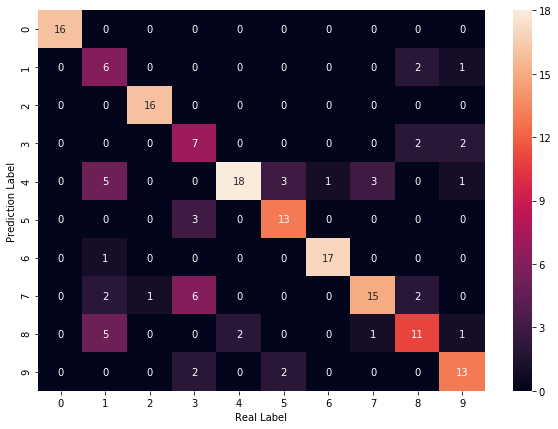

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:13 index:[4] real:5
#1 min_error:12 index:[7] real:2
#2 min_error:13 index:[7] real:8
#3 min_error:4 index:[0] real:0
#4 min_error:15 index:[1 4 7] real:1
#5 min_error:9 index:[7] real:7
#6 min_error:6 index:[6] real:6
#7 min_error:11 index:[3] real:3
#8 min_error:7 index:[2] real:2
#9 min_error:16 index:[1 4 7] real:1
#10 min_error:11 index:[4] real:7
#11 min_error:14 index:[8] real:4
#12 min_error:7 index:[6] real:6
#13 min_error:11 index:[3] real:3
#14 min_error:12 index:[1] real:1
#15 min_error:12 index:[3] real:3
#16 min_error:13 index:[4 9] real:9
#17 min_error:14 index:[1 7] real:1
#18 min_error:14 index:[8] real:7
#19 min_error:5 index:[6] real:6
#20 min_error:11 index:[8] real:8
#21 min_error:7 index:[4] real:4
#22 min_error:9 index:[3] real:3
#23 min_error:13 index:[1 4] real:1
#24 min_error:6 index:[4] real:4
#25 min_error:3 index:[0] real:0
#26 min_error:9 index:[5] real:5
#27 min_error:6 index:[3] real:3
#28 min_error:14 index:[4 6] real:6
#29 min_error:10 ind

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
np.mean(winner_fitness)

0.8112416683845257

In [17]:
from random import randint

list_acc = []

for iii in range(45):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.12222222222222222
Accuracy on training set: 0.10555555555555556
Accuracy on training set: 0.2777777777777778
Accuracy on training set: 0.36666666666666664
Accuracy on training set: 0.3277777777777778
Accuracy on training set: 0.3611111111111111
Accuracy on training set: 0.38333333333333336
Accuracy on training set: 0.42777777777777776
Accuracy on training set: 0.4222222222222222
Accuracy on training set: 0.45
Accuracy on training set: 0.46111111111111114
Accuracy on training set: 0.4388888888888889
Accuracy on training set: 0.49444444444444446
Accuracy on training set: 0.5666666666666667
Accuracy on training set: 0.5222222222222223
Accuracy on training set: 0.55
Accuracy on training set: 0.5166666666666667
Accuracy on training set: 0.5833333333333334
Accuracy on training set: 0.5722222222222222
Accuracy on training set: 0.5722222222222222
Accuracy on training set: 0.5722222222222222
Accuracy on training set: 0.5888888888888889
Accuracy on training set: 0.572

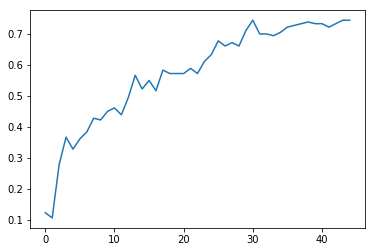

In [18]:
plt.plot(range(45),list_acc)
plt.show()

In [19]:
list_acc

[0.12222222222222222,
 0.10555555555555556,
 0.2777777777777778,
 0.36666666666666664,
 0.3277777777777778,
 0.3611111111111111,
 0.38333333333333336,
 0.42777777777777776,
 0.4222222222222222,
 0.45,
 0.46111111111111114,
 0.4388888888888889,
 0.49444444444444446,
 0.5666666666666667,
 0.5222222222222223,
 0.55,
 0.5166666666666667,
 0.5833333333333334,
 0.5722222222222222,
 0.5722222222222222,
 0.5722222222222222,
 0.5888888888888889,
 0.5722222222222222,
 0.6111111111111112,
 0.6333333333333333,
 0.6777777777777778,
 0.6611111111111111,
 0.6722222222222223,
 0.6611111111111111,
 0.7111111111111111,
 0.7444444444444445,
 0.7,
 0.7,
 0.6944444444444444,
 0.7055555555555556,
 0.7222222222222222,
 0.7277777777777777,
 0.7333333333333333,
 0.7388888888888889,
 0.7333333333333333,
 0.7333333333333333,
 0.7222222222222222,
 0.7333333333333333,
 0.7444444444444445,
 0.7444444444444445]

In [20]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(45):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(45 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8491032776747063
Avg Base Learner:0.8112416683845257
